In [1]:
import pandas as pd
df = pd.read_csv('laptop_data.csv')
df.shape

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


(1303, 12)

In [2]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [5]:


df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder 
labal = LabelEncoder()

In [8]:
df['Company'] = labal.fit_transform(df['Company'])

In [9]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [10]:
df['TypeName']  = df['TypeName'].replace({'Notebook':1,'Gaming':2,'Ultrabook':3,'2 in 1 Convertible':4,'Workstation':5,'Netbook':6})

In [11]:

df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [12]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [13]:
df['Ram'] = df['Ram'].str.replace('GB',' ')

In [14]:
df['Ram'] = df['Ram'].astype(int)

In [15]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [16]:
df['Weight'].value_counts()

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [17]:
df['Weight'] = df['Weight'].str.replace('kg',' ').astype(float)

In [18]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [19]:
df['OpSys'] = labal.fit_transform(df['OpSys'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   TypeName          1303 non-null   int64  
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   int32  
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(4)
memory usage: 96.8+ KB


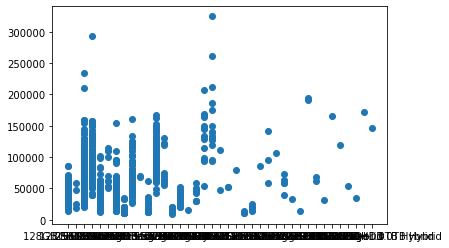

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df['Memory'],df['Price'])

In [22]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [23]:
df['i5'] = df['Cpu'].apply(lambda x: 1 if 'Intel Core i5' in x else 0)


In [24]:
df['i7'] = df['Cpu'].apply(lambda x: 1 if 'Intel Core i7' in x else 0)


In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,i5,i7
0,1,3,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,8,1.37,71378.6832,1,0
1,1,3,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,8,1.34,47895.5232,1,0
2,7,1,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,4,1.86,30636.0000,1,0
3,1,3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,8,1.83,135195.3360,0,1
4,1,3,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,8,1.37,96095.8080,1,0


In [26]:
df = df.drop(columns=['Cpu'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   TypeName          1303 non-null   int64  
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   int32  
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  i5                1303 non-null   int64  
 11  i7                1303 non-null   int64  
dtypes: float64(3), int32(3), int64(3), object(3)
memory usage: 107.0+ KB


In [28]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [29]:
df['HD graphics620'] = df['Gpu'].apply(lambda x: 1 if 'Intel HD Graphics 620' in x else 0)


In [30]:
df['HD graphics520'] = df['Gpu'].apply(lambda x: 1 if 'Intel HD Graphics 520' in x else 0)


In [31]:
df['AMD'] = df['Gpu'].apply(lambda x: 1 if 'AMD Radeon' in x else 0)


In [32]:
df['Nvidia GeForce'] = df['Gpu'].apply(lambda x: 1 if 'Nvidia GeForce' in x else 0)


In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,i5,i7,HD graphics620,HD graphics520,AMD,Nvidia GeForce
0,1,3,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,8,1.37,71378.6832,1,0,0,0,0,0
1,1,3,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,8,1.34,47895.5232,1,0,0,0,0,0
2,7,1,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,4,1.86,30636.0000,1,0,1,0,0,0
3,1,3,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,8,1.83,135195.3360,0,1,0,0,1,0
4,1,3,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,8,1.37,96095.8080,1,0,0,0,0,0


In [34]:
df = df.drop(columns=['Gpu'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   TypeName          1303 non-null   int64  
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   OpSys             1303 non-null   int32  
 7   Weight            1303 non-null   float64
 8   Price             1303 non-null   float64
 9   i5                1303 non-null   int64  
 10  i7                1303 non-null   int64  
 11  HD graphics620    1303 non-null   int64  
 12  HD graphics520    1303 non-null   int64  
 13  AMD               1303 non-null   int64  
 14  Nvidia GeForce    1303 non-null   int64  
dtypes: float64(3), int32(3), int64(7), object(2)
memory usage: 137.6+ KB


In [36]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [37]:
df['memory'] = df['Memory'].str.split()

In [38]:
df['memory']

0                  [128GB, SSD]
1       [128GB, Flash, Storage]
2                  [256GB, SSD]
3                  [512GB, SSD]
4                  [256GB, SSD]
                 ...           
1298               [128GB, SSD]
1299               [512GB, SSD]
1300     [64GB, Flash, Storage]
1301                 [1TB, HDD]
1302               [500GB, HDD]
Name: memory, Length: 1303, dtype: object

In [39]:
df['SSD'] = df['memory'].str[0]


In [40]:
df['SSD'].value_counts()

SSD
256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [41]:
df['SSD'] = df['SSD'].str.replace('GB',' ')

In [42]:
df['SSD'] = df['SSD'].str.replace('TB',' ')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   TypeName          1303 non-null   int64  
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   OpSys             1303 non-null   int32  
 7   Weight            1303 non-null   float64
 8   Price             1303 non-null   float64
 9   i5                1303 non-null   int64  
 10  i7                1303 non-null   int64  
 11  HD graphics620    1303 non-null   int64  
 12  HD graphics520    1303 non-null   int64  
 13  AMD               1303 non-null   int64  
 14  Nvidia GeForce    1303 non-null   int64  
 15  memory            1303 non-null   object 
 16  SSD               1303 non-null   object 


In [44]:
df = df.drop(columns=['memory','Memory','ScreenResolution'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1303 non-null   int32  
 1   TypeName        1303 non-null   int64  
 2   Inches          1303 non-null   float64
 3   Ram             1303 non-null   int32  
 4   OpSys           1303 non-null   int32  
 5   Weight          1303 non-null   float64
 6   Price           1303 non-null   float64
 7   i5              1303 non-null   int64  
 8   i7              1303 non-null   int64  
 9   HD graphics620  1303 non-null   int64  
 10  HD graphics520  1303 non-null   int64  
 11  AMD             1303 non-null   int64  
 12  Nvidia GeForce  1303 non-null   int64  
 13  SSD             1303 non-null   object 
dtypes: float64(3), int32(3), int64(7), object(1)
memory usage: 127.4+ KB


In [46]:
df['SSD'] = df['SSD'].astype(float)

In [47]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,i5,i7,HD graphics620,HD graphics520,AMD,Nvidia GeForce,SSD
0,1,3,13.3,8,8,1.37,71378.6832,1,0,0,0,0,0,128.0
1,1,3,13.3,8,8,1.34,47895.5232,1,0,0,0,0,0,128.0
2,7,1,15.6,8,4,1.86,30636.0000,1,0,1,0,0,0,256.0
3,1,3,15.4,16,8,1.83,135195.3360,0,1,0,0,1,0,512.0
4,1,3,13.3,8,8,1.37,96095.8080,1,0,0,0,0,0,256.0


In [48]:
x = df.drop(columns=['Price'])
y = df['Price']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=54)

In [50]:
from sklearn.preprocessing import StandardScaler
sclar = StandardScaler()

In [51]:
scl_x_train = sclar.fit_transform(x_train)
scl_x_test = sclar.transform(x_test)

In [52]:
sclar.fit(scl_x_train,y_train)

StandardScaler()

In [53]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()
las = Lasso(alpha=1)
rid = Ridge()

In [54]:
model.fit(scl_x_train,y_train)

LinearRegression()

In [55]:
y_pred = model.predict(scl_x_test)

In [56]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_pred,y_test)

0.6030617272708348

In [57]:
y_pred

array([101340.35809774,  57672.23868473,  39492.34793552,  63777.35617364,
        23893.9676352 ,  93465.73299856,  25056.70878632,  83216.49713221,
       104099.33537569,  36715.73676911,  21428.4726738 ,  46744.14367418,
        45827.83803697,  45050.44431116,  68676.92326112, 143795.2143855 ,
        19250.47563671,  74533.32713773,  64840.71257663,  75593.3330874 ,
       103831.43010436,  15640.18003445,  68844.83435552, 115802.9409761 ,
        52316.03922886,  27577.66042148,  66627.03780546, 130506.97533723,
        23200.83777966, 111384.9849472 ,  66482.84883236,   -383.37579566,
        77812.23962124, 105395.21881889,  50763.44020044,  52910.56754998,
        62593.04830523,  54323.90603123,  83431.85706359,  26192.63126834,
        98174.03069873,  52529.82461252,  34772.30884342,  42578.02969778,
        96471.57841493,  75045.52298121,  56088.12639564, 105658.53424832,
        67574.35943871,  43693.49020664,  27022.1993507 ,  60375.39175118,
        59795.73986123,  

In [58]:
las.fit(scl_x_train,y_train)

Lasso(alpha=1)

In [59]:
las.score(scl_x_test,y_test)

0.7066611731898003

In [60]:
rid.fit(scl_x_train,y_train)

Ridge()

In [61]:
rid.score(scl_x_test,y_test)

0.7066903459725682

In [62]:
Y = rid.predict(scl_x_test)

In [63]:
from sklearn.metrics import accuracy_score,r2_score
r2_score(y_test,Y)

0.7066903459725682

In [64]:
rid_data= pd.DataFrame([['10','4','15.6','8','5','2.08','1','0','0','0','1','0','256.0']],columns=['Company','TypeName','Inches','Ram','OpSys','Weight','i5','i7','HD graphics620','HD graphics520','AMD','Nvidia GeForce','SSD'])

In [65]:
rid_data = sclar.transform(rid_data)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [66]:
rid.predict(rid_data)

array([1084017.50392848])

In [67]:
import pickle as pk

In [68]:
pk.dump(labal,open('labal.pkl','wb'))

In [69]:
pk.dump(sclar,open('sclar.pkl','wb'))

In [70]:
pk.dump(rid,open('rid.pkl','wb'))

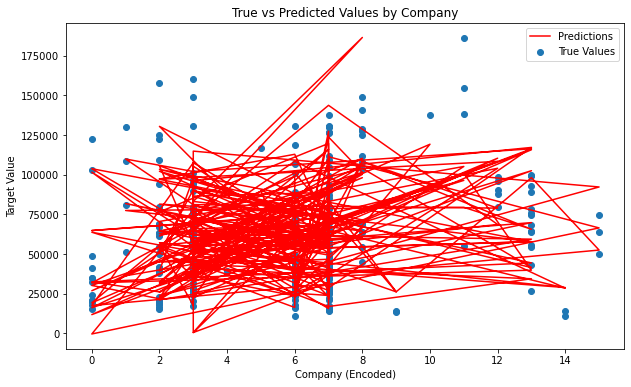

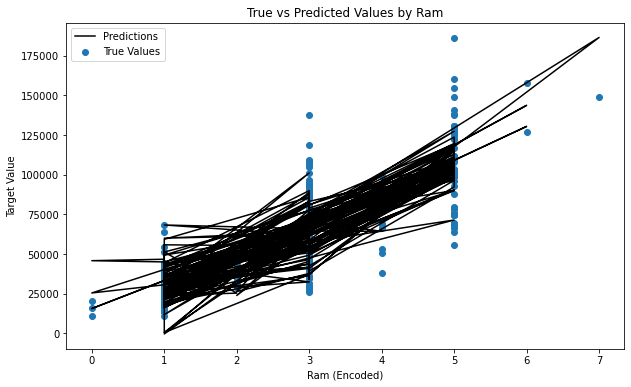

In [81]:
import matplotlib.pyplot as plt
import numpy as np

x_numerical = x_test['Company'].astype('category').cat.codes.to_numpy()
y_test_np = np.array(y_test)  
y_pred_np = np.array(y_pred)  
plt.figure(figsize=(10, 6))
plt.scatter(x_numerical, y_test_np, label='True Values')

plt.plot(x_numerical, y_pred_np, 'r', label='Predictions')
plt.xlabel('Company (Encoded)')
plt.ylabel('Target Value')
plt.title('True vs Predicted Values by Company')
plt.legend()
plt.show()

x_numerical = x_test['Ram'].astype('category').cat.codes.to_numpy()
plt.figure(figsize=(10, 6))
plt.scatter(x_numerical, y_test_np, label='True Values',)

plt.plot(x_numerical, y_pred_np, 'black', label='Predictions')
plt.xlabel('Ram (Encoded)')
plt.ylabel('Target Value')
plt.title('True vs Predicted Values by Ram')
plt.legend()
plt.show()


